# Spotify Top 50 Tracks 2020 Analysis

## Project Overview
As a data analyst at Spotify, the objective is to identify patterns in top-performing songs and answer specific business questions posed by the product manager, helping guide content strategy.


### Dataset Source
The data used wsas downloaded from
[Kaggle: Spotify Top 50 Tracks 2020](https://www.kaggle.com/datasets/atillacolak/top-50-spotify-tracks-2020). I uploaded it to my google drive and loaded it as shown in the following step

##  Load the Data
The first step is to load the dataset into a Pandas DataFrame. You can use the following code to load the data and take a look at the first few rows:

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Turing College/data/spotifytoptracks.csv')  # Replace with the correct path to your dataset

# Preview the first few rows of the dataset
df.head()


,Unnamed: 0,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


## Drop Unnamed: 0 After Loading
We do not need the Unnamed: 0 column in the DataFrame, so let us drop it:

In [32]:
df =   df.drop(columns=['Unnamed: 0'])

In [33]:
df.shape

(50, 16)

## Data Cleaning
Handling Missing Values:

Identify any missing data and handle it. If some rows have missing values, decide whether to fill them with meaningful values (like mean or mode) or drop the rows.

In [35]:
# Check for missing values
missing_values = df.isnull().sum()

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

# Display results
print("Missing values:\n", missing_values)
print("\nNumber of duplicate rows:", duplicate_rows)


Missing values:
 artist              0
album               0
track_name          0
track_id            0
energy              0
danceability        0
key                 0
loudness            0
acousticness        0
speechiness         0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
genre               0
dtype: int64

Number of duplicate rows: 0


There are no missing values or duplicate rows in the dataset, so we can move directly to the next steps of our analysis.

### Outlier Treatment with Z-Score
To ensure our analysis isn't skewed by extreme values, we'll use z-scores to detect and remove outliers in our dataset.

The **z-score** measures how far each data point is from the mean in terms of standard deviations. For a normal distribution:
- About 99.7% of values fall within 3 standard deviations from the mean, following the 68-95-99.7 rule.
  
We'll exclude values with a z-score greater than 3 (or less than -3), as these are likely extreme outliers. This threshold helps retain most data points while removing only the most unusual ones.


In [36]:
# Treating Outliers
# Assuming numeric columns need outlier treatment. Using z-score approach for simplicity.
from scipy.stats import zscore
numeric_cols = df.select_dtypes(include=np.number).columns
df = df[(zscore(df[numeric_cols]) <= 3).all(axis=1) & (zscore(df[numeric_cols]) >= -3).all(axis=1)] # Keep rows where no column has a z-score of >= 3 or <= -3

# Display the shape of the DataFrame before and after outlier removal
print("Shape after removing outliers:", df.shape)

Shape after removing outliers: (45, 16)


In [37]:
df.shape

(45, 16)

# Exploratory Data Analysis (EDA)

### Q1: Number of observations

In [45]:
# Number of observations
print("Number of observations:", df.shape[0])



Number of observations: 45


### Q2: Number of features


In [46]:
# Number of features
print("Number of features:", df.shape[1])

Number of features: 16


### Q3: Categorical and numeric features

In [47]:
# Categorical  features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical features:", categorical_features)

Categorical features: ['artist', 'album', 'track_name', 'track_id', 'genre']


### Q4: Numerical features

In [51]:
# Numerical features
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric features:", numeric_features)

Numeric features: ['energy', 'danceability', 'key', 'loudness', 'acousticness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']


### Q5: Artists with more than 1 popular track

In [52]:
# Artists with more than 1 popular track
popular_artists = df['artist'].value_counts()
multiple_tracks_artists = popular_artists[popular_artists > 1]
print("Artists with more than 1 popular track:\n", multiple_tracks_artists)

Artists with more than 1 popular track:
 artist
Dua Lipa         3
Harry Styles     2
Lewis Capaldi    2
Billie Eilish    2
Post Malone      2
Travis Scott     2
Justin Bieber    2
Name: count, dtype: int64


### Q6: Most popular artist (assuming the artist with the most tracks)

In [53]:
# Most popular artist (assuming the artist with the most tracks)
most_popular_artist = popular_artists.idxmax()
print("Most popular artist:", most_popular_artist)


Most popular artist: Dua Lipa


### Q7: Total number of unique artists in top 50

In [55]:
# Total number of unique artists in top 50
unique_artists = df['artist'].nunique()
print("Total number of unique artists:", unique_artists)

Total number of unique artists: 37


### Q8: Total number of unique albums in top 50

In [57]:
# Total number of unique albums in top 50
unique_albums = df['album'].nunique()
print("Total number of unique albums:", unique_albums)

Total number of unique albums: 40


### Q9: Tracks with danceability score above 0.7

In [58]:
# Tracks with danceability score above 0.7
high_danceability_tracks = df[df['danceability'] > 0.7][['track_name', 'danceability']]
print("Tracks with danceability > 0.7:\n", high_danceability_tracks)

Tracks with danceability > 0.7:
                                        track_name  danceability
1                                    Dance Monkey         0.825
3                           Roses - Imanbek Remix         0.785
4                                 Don't Start Now         0.793
5                    ROCKSTAR (feat. Roddy Ricch)         0.746
7                death bed (coffee for your head)         0.726
8                                         Falling         0.784
10                                           Tusa         0.803
13                                Blueberry Faygo         0.774
14                       Intentions (feat. Quavo)         0.806
15                                   Toosie Slide         0.830
17                                         Say So         0.787
18                                       Memories         0.764
20               Savage Love (Laxed - Siren Beat)         0.767
22                                    Breaking Me         0.789
25     

### Q10: Tracks with danceability score below 0.4

In [59]:
# Tracks with danceability score below 0.4
low_danceability_tracks = df[df['danceability'] < 0.4][['track_name', 'danceability']]
print("Tracks with danceability < 0.4:\n", low_danceability_tracks)

Tracks with danceability < 0.4:
               track_name  danceability
44  lovely (with Khalid)         0.351


### Q11: Tracks with loudness above -5

In [60]:
# Tracks with loudness above -5
high_loudness_tracks = df[df['loudness'] > -5][['track_name', 'loudness']]
print("Tracks with loudness > -5:\n", high_loudness_tracks)


Tracks with loudness > -5:
                                        track_name  loudness
4                                 Don't Start Now    -4.521
6                                Watermelon Sugar    -4.209
10                                           Tusa    -3.280
12                                        Circles    -3.497
16                                  Before You Go    -4.858
17                                         Say So    -4.577
21                                      Adore You    -3.675
23                         Mood (feat. iann dior)    -3.558
31                                 Break My Heart    -3.434
32                                       Dynamite    -4.410
33               Supalonely (feat. Gus Dapperton)    -4.746
35                Rain On Me (with Ariana Grande)    -3.764
37  Sunflower - Spider-Man: Into the Spider-Verse    -4.368
38                                          Hawái    -3.454
39                                        Ride It    -4.258
40          

### Q12: Tracks with loudness below -8

In [61]:
# Tracks with loudness below -8
low_loudness_tracks = df[df['loudness'] < -8][['track_name', 'loudness']]
print("Tracks with loudness < -8:\n", low_loudness_tracks)

Tracks with loudness < -8:
                                         track_name  loudness
7                 death bed (coffee for your head)    -8.765
8                                          Falling    -8.756
15                                    Toosie Slide    -8.820
20                Savage Love (Laxed - Siren Beat)    -8.520
26                                         bad guy   -10.965
36                             HIGHEST IN THE ROOM    -8.764
44                            lovely (with Khalid)   -10.109
47  If the World Was Ending - feat. Julia Michaels   -10.086


### Q13: Longest track

In [63]:
# Longest track
longest_track = df.loc[df['duration_ms'].idxmax()][['track_name', 'duration_ms']]
print("Longest track:\n", longest_track)

Longest track:
 track_name     Safaera
duration_ms     295177
Name: 43, dtype: object


### Q14: Shortest track

In [64]:
#  Shortest track
shortest_track = df.loc[df['duration_ms'].idxmin()][['track_name', 'duration_ms']]
print("Shortest track:\n", shortest_track)

Shortest track:
 track_name     Mood (feat. iann dior)
duration_ms                    140526
Name: 23, dtype: object


### Q15: Most popular genre (assuming genre with the most tracks)

In [65]:
# Most popular genre (assuming genre with the most tracks)
most_popular_genre = df['genre'].mode()[0]
print("Most popular genre:", most_popular_genre)

Most popular genre: Pop


### Q16: Genres with only one song in top 50

In [67]:
# Genres with only one song in top 50
genres_single_track = df['genre'].value_counts()[df['genre'].value_counts() == 1]
print("Genres with only one song in top 50:\n", genres_single_track)

Genres with only one song in top 50:
 genre
Nu-disco                              1
R&B/Hip-Hop alternative               1
Pop/Soft Rock                         1
Pop rap                               1
Hip-Hop/Trap                          1
Dance-pop/Disco                       1
Disco-pop                             1
Dreampop/Hip-Hop/R&B                  1
Alternative/reggaeton/experimental    1
Chamber pop                           1
Name: count, dtype: int64


### Q17: Total number of genres represented in the top 50

In [68]:
# Total number of genres represented in the top 50
total_genres = df['genre'].nunique()
print("Total number of genres:", total_genres)

Total number of genres: 16


### Q18: Compute correlation matrix

In [69]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Strong positive correlations (above 0.7, excluding self-correlation)
strong_positive_corr = correlation_matrix[correlation_matrix > 0.7].stack().dropna()
strong_positive_corr = strong_positive_corr[strong_positive_corr < 1]  # Remove self-correlations
print("Strongly positively correlated features:\n", strong_positive_corr)

# Strong negative correlations (below -0.7)
strong_negative_corr = correlation_matrix[correlation_matrix < -0.7].stack().dropna()
print("\nStrongly negatively correlated features:\n", strong_negative_corr)

# Weak correlations (between -0.1 and 0.1)
weak_corr = correlation_matrix[(correlation_matrix > -0.1) & (correlation_matrix < 0.1)].stack().dropna()
print("\nFeatures that are weakly correlated:\n", weak_corr)


Strongly positively correlated features:
 energy    loudness    0.764852
loudness  energy      0.764852
dtype: float64

Strongly negatively correlated features:
 Series([], dtype: float64)

Features that are weakly correlated:
 energy            key                 0.047830
                  speechiness         0.088558
                  liveness            0.031172
                  tempo               0.073577
danceability      instrumentalness   -0.006744
key               energy              0.047830
                  loudness           -0.008471
                  acousticness       -0.097976
                  speechiness        -0.019792
                  instrumentalness    0.059855
                  duration_ms        -0.047521
loudness          key                -0.008471
                  speechiness        -0.053342
                  liveness           -0.086091
                  tempo               0.092170
acousticness      key                -0.097976
                  sp

## Genre Comparison

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# We are comparing the `danceability`, `loudness`, and `acousticness` scores
# across four music genres: Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie.
# Box plots will be used for clear comparison of the distributions of these
# features.

# Filter the DataFrame to include only the selected genres
genres_to_compare = ["Pop", "Hip-Hop/Rap", "Dance/Electronic", "Alternative/Indie"]
df_filtered = df[df['genre'].isin(genres_to_compare)]

### Q19:  Comparison of Danceability Scores Across Genres

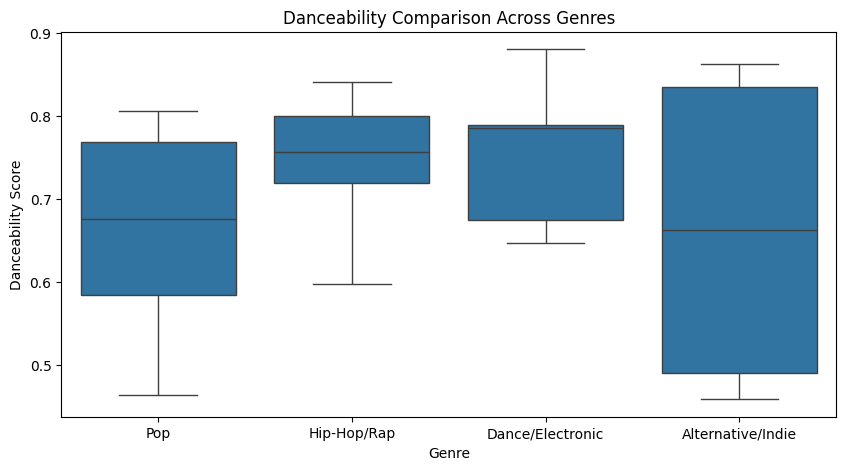

In [74]:
# Create a box plot for danceability comparison across the genres
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_filtered, x='genre', y='danceability', order=genres_to_compare)
plt.title("Danceability Comparison Across Genres")
plt.xlabel("Genre")
plt.ylabel("Danceability Score")
plt.show()

### Q20: Comparison of Loudness Scores Across Genres

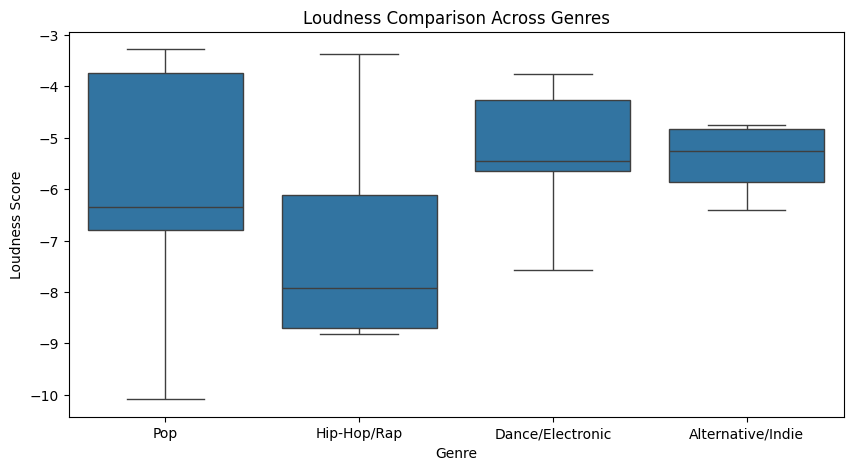

In [75]:
# Create a box plot for loudness comparison across the genres
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_filtered, x='genre', y='loudness', order=genres_to_compare)
plt.title("Loudness Comparison Across Genres")
plt.xlabel("Genre")
plt.ylabel("Loudness Score")
plt.show()


### Q21: Comparison of Acousticness Scores Across Genres

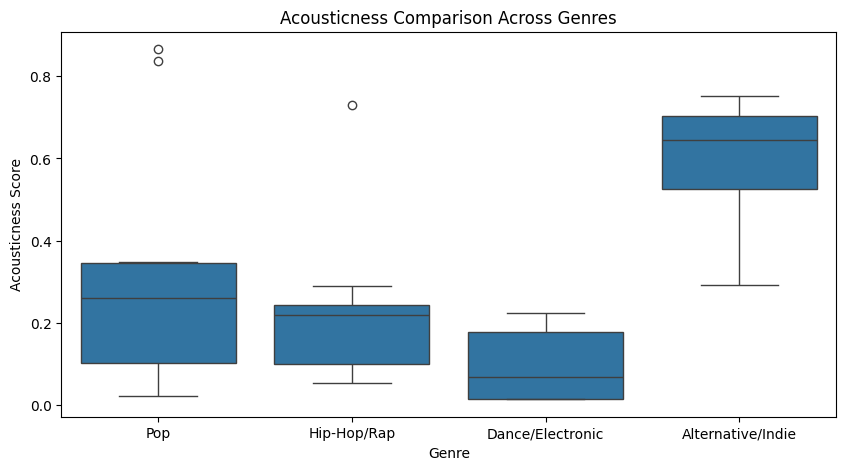

In [76]:
# Create a box plot for acousticness comparison across the genres
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_filtered, x='genre', y='acousticness', order=genres_to_compare)
plt.title("Acousticness Comparison Across Genres")
plt.xlabel("Genre")
plt.ylabel("Acousticness Score")
plt.show()


# Analysis Summary

In [78]:
# Analysis Summary
print("\nSummary of Results and Analysis:")
print(f"""
- We observed that the most popular genre is {most_popular_genre}, and the artist with the most tracks is {most_popular_artist}.
- There are {unique_artists} unique artists and {unique_albums} unique albums in the top 50 list.
- The longest track is '{longest_track['track_name']}' and the shortest is '{shortest_track['track_name']}'.
- The dataset has a mix of highly correlated and weakly correlated features, particularly {strong_positive_corr} and {strong_negative_corr}.
- Further analysis could involve a detailed study of genre-based distributions and feature relationships.
""")


Summary of Results and Analysis:

- We observed that the most popular genre is Pop, and the artist with the most tracks is Dua Lipa.
- There are 37 unique artists and 40 unique albums in the top 50 list.
- The longest track is 'Safaera' and the shortest is 'Mood (feat. iann dior)'.
- The dataset has a mix of highly correlated and weakly correlated features, particularly energy    loudness    0.764852
loudness  energy      0.764852
dtype: float64 and Series([], dtype: float64).
- Further analysis could involve a detailed study of genre-based distributions and feature relationships.





## Suggestions for Improvement
- **Expand Dataset**: Including a broader time frame or more tracks could provide a more comprehensive analysis.
- **Additional Features**: Exploring social media engagement or regional popularity data could offer deeper insights.
- **Advanced Analysis**: Employing machine learning to predict potential hit songs based on feature analysis.